In [2]:
import pandas as pd
import numpy as np

In [3]:
names1880 = pd.read_csv("yob1880.txt", names=["name", "sex", "births"])

In [4]:
names1880.head()

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [5]:
names1880.groupby("sex")["births"].sum()

sex
F     90994
M    110490
Name: births, dtype: int64

In [7]:
pieces = []
for year in range(1880, 2011):
    path = f"yob{year}.txt"
    frame = pd.read_csv(path, names=["Name", "Sex", "Births"])
    frame["year"] = year
    pieces.append(frame)

names = pd.concat(pieces, ignore_index=True)

In [8]:
names.head()

,Name,Sex,Births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [9]:
len(names)

1692484

In [10]:
names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692484 entries, 0 to 1692483
Data columns (total 4 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Name    object
 1   Sex     object
 2   Births  int64 
 3   year    int64 
dtypes: int64(2), object(2)
memory usage: 51.7+ MB


In [11]:
total_births = names.pivot_table("Births", index="year", columns="Sex", aggfunc=sum)

In [12]:
total_births.tail()

Sex,F,M
year,,
2006,1900673,2054644
2007,1921941,2074707
2008,1890111,2039317
2009,1836214,1982609
2010,1776636,1917792


<Axes: title={'center': 'Total Births by Sex and Year'}, xlabel='year'>

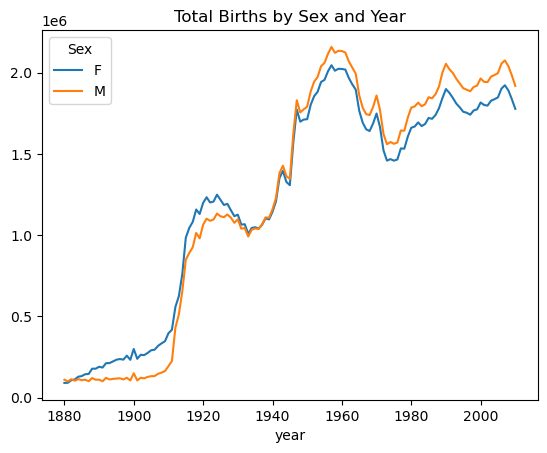

In [13]:
total_births.plot(title="Total Births by Sex and Year")

In [14]:
def add_prop(group):
    group["prop"] = group["Births"] / group["Births"].sum()
    return group

In [16]:
names["Births"] / names["Births"].sum()

0          2.189705e-05
1          8.070761e-06
2          6.208039e-06
3          6.009679e-06
4          5.411501e-06
               ...     
1692479    1.549685e-08
1692480    1.549685e-08
1692481    1.549685e-08
1692482    1.549685e-08
1692483    1.549685e-08
Name: Births, Length: 1692484, dtype: float64